# **COURSE PROJECT - II - Drinking and Smoking Dataset**



---



# **TEAM ID:** 02

###Nirmal Shah      202311043
###Samarth Motka    202311023
###Darshit Kalariya 202311035
###Deepak Khatri    202311042
###Viraj Prajapati  202311069

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**

In [ ]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N




*   **Here is brief note about our smoking and drinking dataset**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

so there is no null value in the dataset




*    **check the number of unique values in each column:**





In [ ]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [ ]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].astype(int)
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

After running this code, the 'SMK_stat_type_cd' column in the DataFrame 'df' will be of integer data type, allowing us to perform numerical operations and analysis on this column.



*   **One-hot encoding is a technique commonly used to convert categorical variables into a binary (0 or 1) format, making them suitable for machine learning algorithms.here, it's applied to the 'sex' column.**:



In [ ]:
new_df = pd.get_dummies(df, columns=['sex'])
new_df

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,Y,0,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3,N,0,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1,N,0,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,N,0,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,15.0,1.0,1.0,26.0,36.0,27.0,1,N,0,1
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,15.8,1.0,1.1,14.0,17.0,15.0,1,N,0,1
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,14.3,1.0,0.8,30.0,27.0,17.0,3,Y,1,0
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,14.5,1.0,0.8,21.0,14.0,17.0,1,N,0,1




*   **If there is ordinal features then we will make use of label encoding because it assigns numerical labels to the categories in a way that respects their inherent order.**


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Fit the encoder on the 'Category' column and transform it
new_df['DRK'] = label_encoder.fit_transform(new_df['DRK_YN'])
new_df


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male,DRK
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,1.0,21.0,35.0,40.0,1,Y,0,1,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,1.0,0.9,20.0,36.0,27.0,3,N,0,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,1.0,0.9,47.0,32.0,68.0,1,N,0,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.0,1.1,29.0,34.0,18.0,1,N,0,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,1.0,0.8,19.0,12.0,25.0,1,N,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,1.0,1.0,26.0,36.0,27.0,1,N,0,1,0
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,1.0,1.1,14.0,17.0,15.0,1,N,0,1,0
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,1.0,0.8,30.0,27.0,17.0,3,Y,1,0,1
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,1.0,0.8,21.0,14.0,17.0,1,N,0,1,0


In [ ]:
# Drop some non-relatable column
new_df = new_df.drop(columns=['DRK_YN',"sight_left"	,"sight_right"	,"hear_left"	,"hear_right"])
new_df

,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_Female,sex_Male,DRK
0,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1,0,1,1
1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3,0,1,0
2,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1,0,1,0
3,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1,0,1,0
4,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,114.0,80.0,88.0,198.0,46.0,125.0,...,15.0,1.0,1.0,26.0,36.0,27.0,1,0,1,0
991342,35,170,75,86.0,119.0,83.0,83.0,133.0,40.0,84.0,...,15.8,1.0,1.1,14.0,17.0,15.0,1,0,1,0
991343,40,155,50,68.0,110.0,70.0,90.0,205.0,96.0,77.0,...,14.3,1.0,0.8,30.0,27.0,17.0,3,1,0,1
991344,25,175,60,72.0,119.0,74.0,69.0,122.0,38.0,73.0,...,14.5,1.0,0.8,21.0,14.0,17.0,1,0,1,0




*  The columns 'DRK_YN', 'sight_left', 'sight_right', 'hear_left', and 'hear_right' have been removed from the DataFrame.



In [ ]:
new_df.columns

Index(['age', 'height', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'sex_Female', 'sex_Male', 'DRK'],
      dtype='object')



---



---





>
#  **Data Visualization**



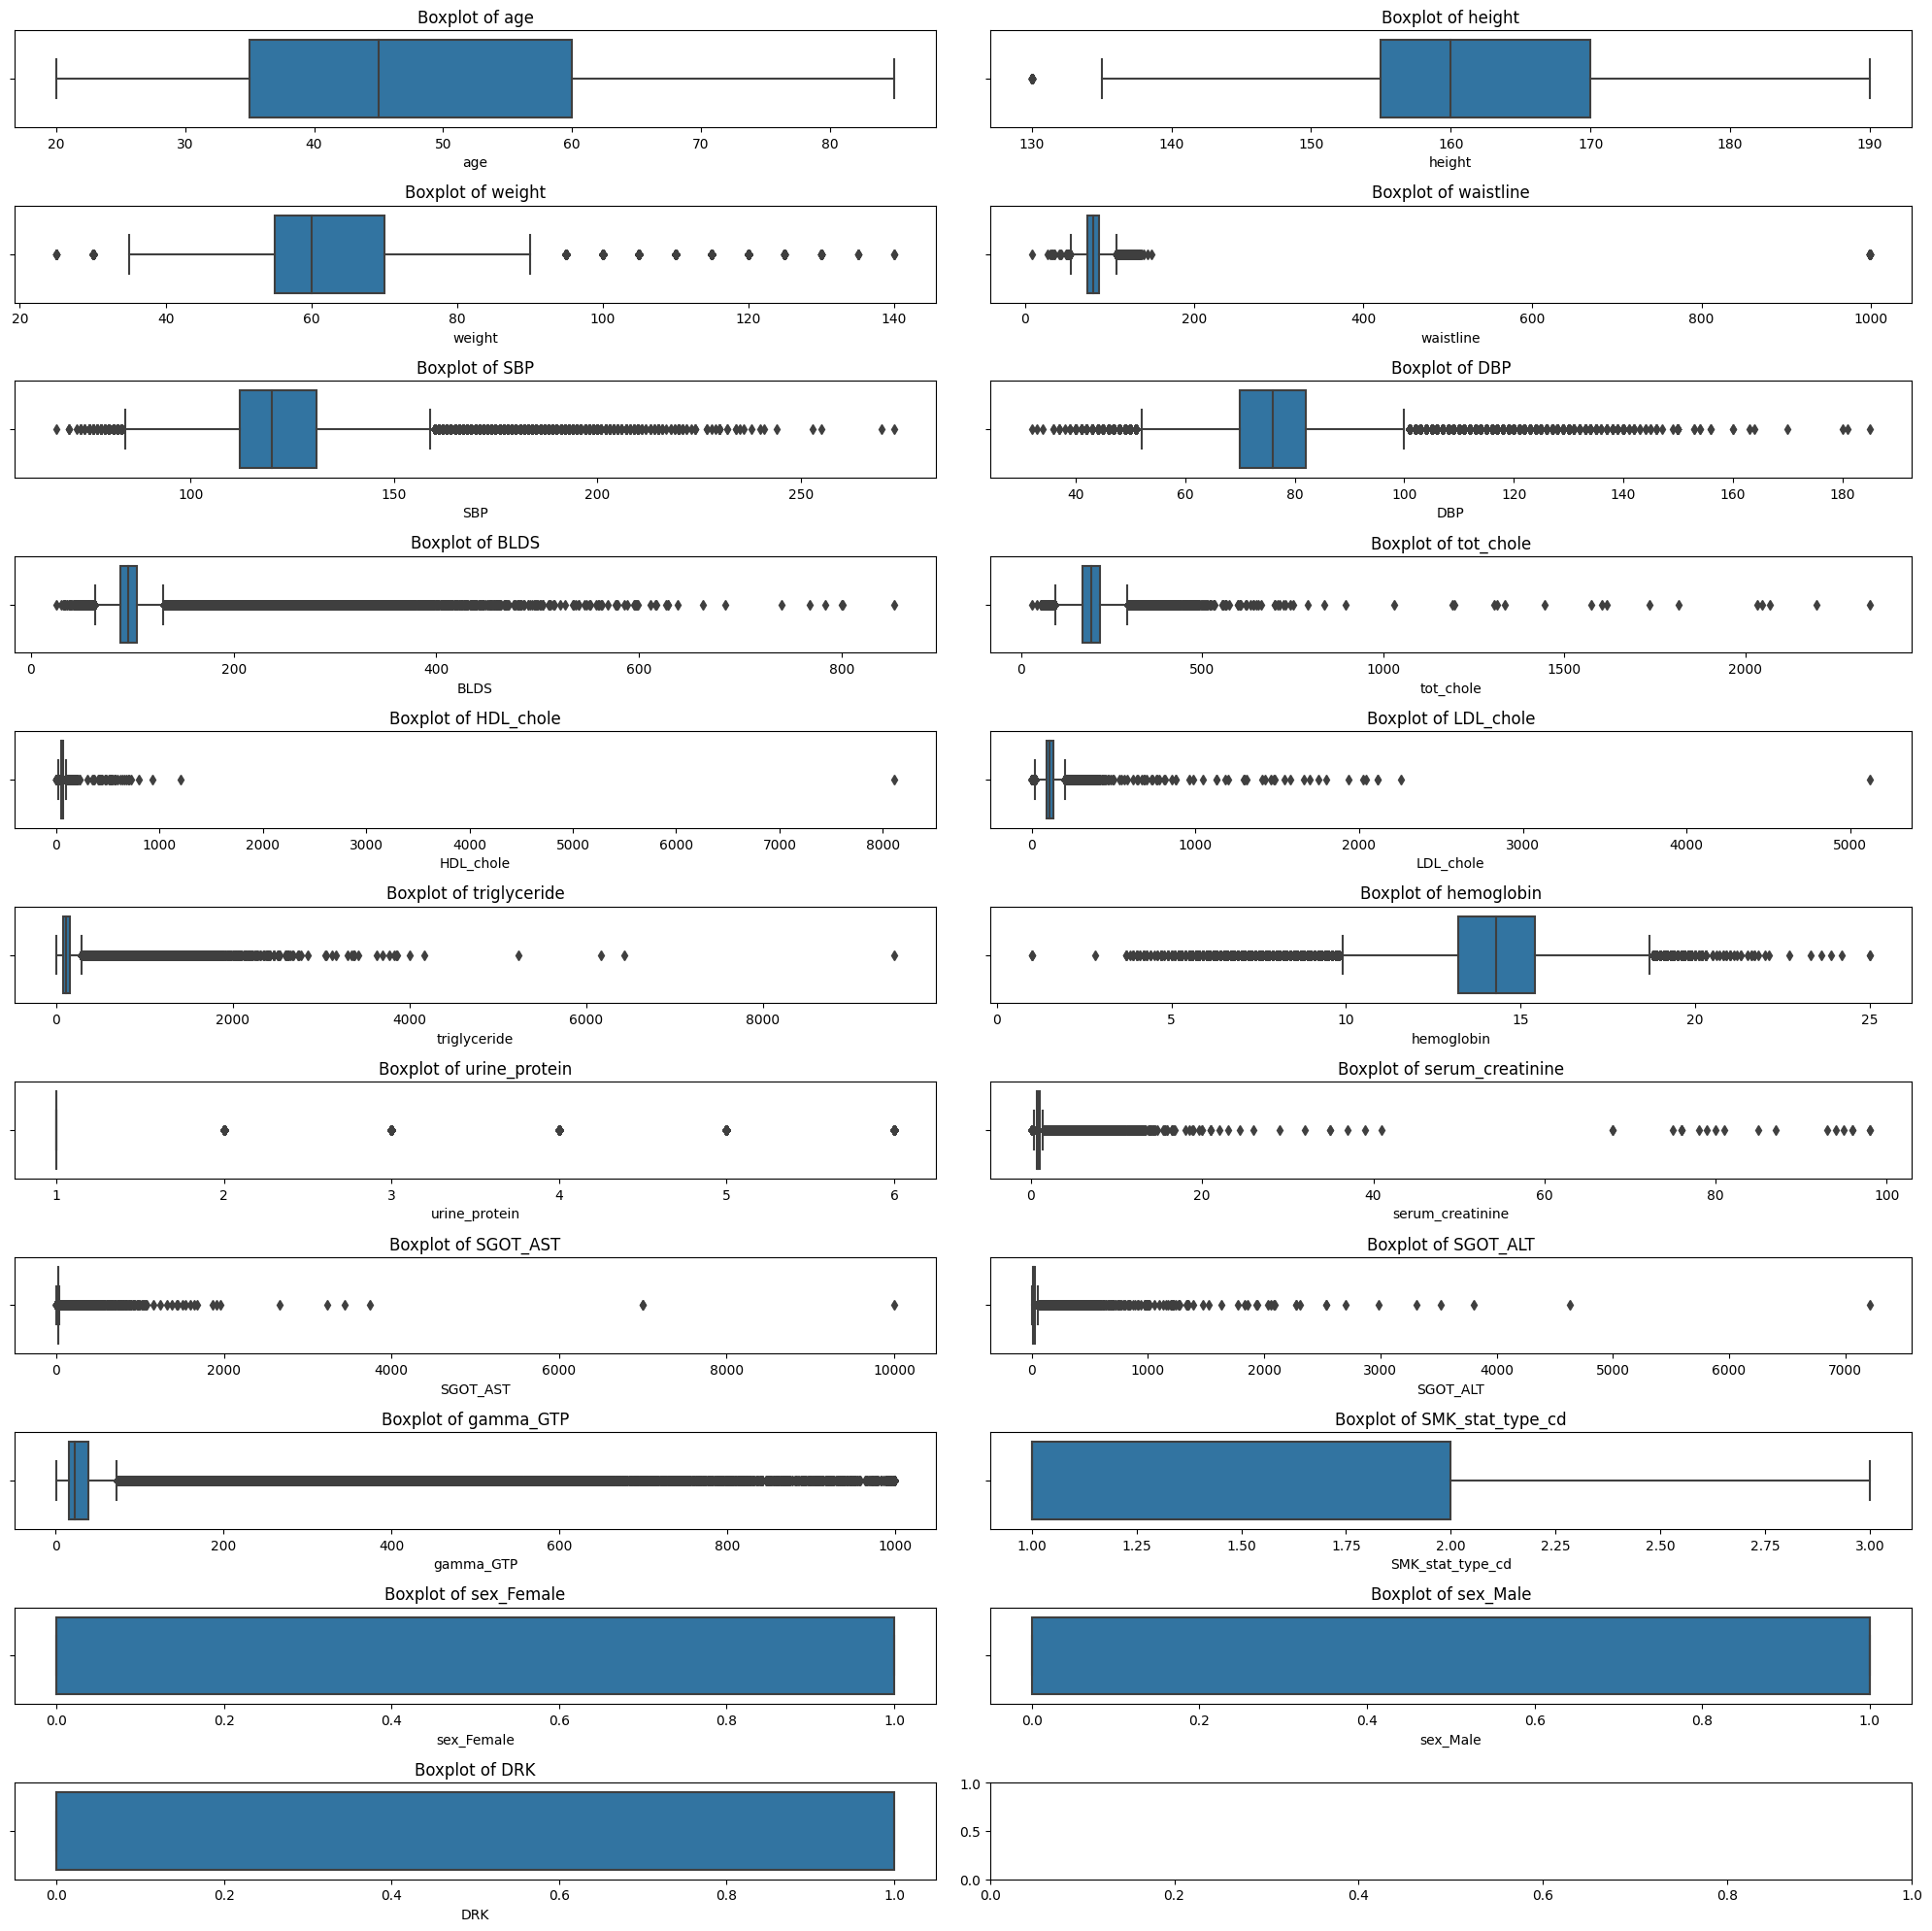

In [ ]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

plot_boxplots(new_df)

In [ ]:
new_df["SMK_stat_type_cd"].value_counts()

1    602441
3    213954
2    174951
Name: SMK_stat_type_cd, dtype: int64

In [ ]:
cd = pd.crosstab(new_df["SMK_stat_type_cd"],new_df["age"])
cd

age,20,25,30,35,40,45,50,55,60,65,70,75,80,85
SMK_stat_type_cd,,,,,,,,,,,,,,
1,15334,42800,45880,41972,71678,66419,77475,68243,67810,35129,36036,19080,11780,2805
2,1228,5100,9863,14539,22094,22203,24512,23016,22670,11760,10464,4635,2467,400
3,5409,16470,21857,28215,36613,29733,27447,19964,15583,6072,4166,1618,721,86


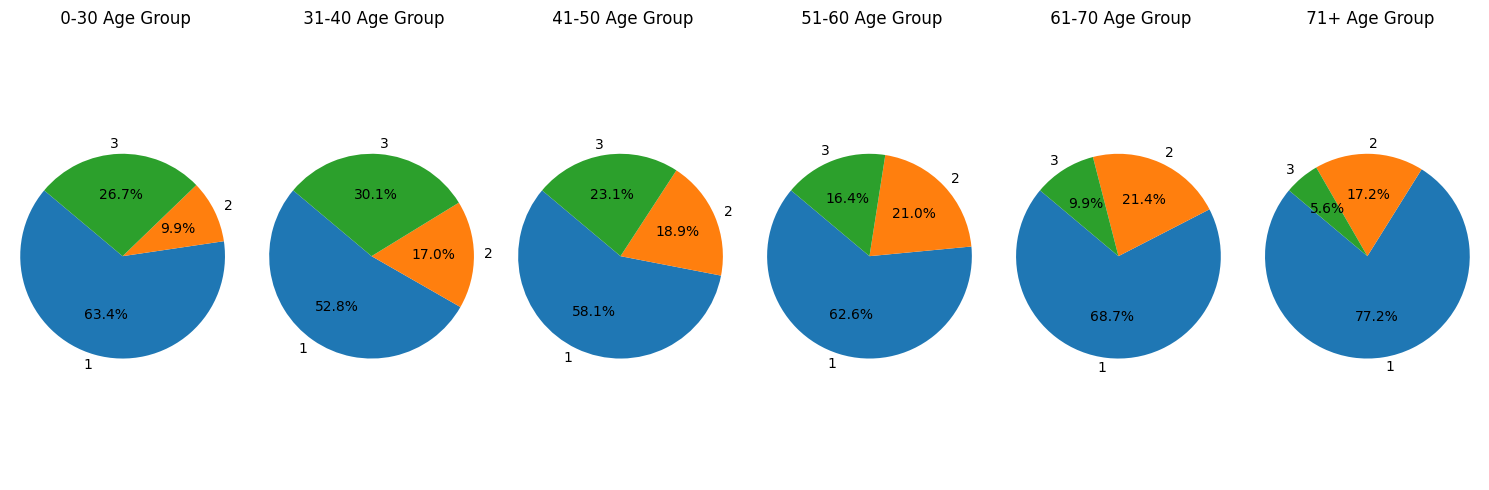

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age groups (you can adjust the age ranges as needed)
age_bins = [0, 30, 40, 50, 60,70, 100]  # Define age bins
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70',"71+"]  # Labels for age groups

# Create a new column 'Age_Group' based on the age bins
new_df['Age_Group'] = pd.cut(new_df['age'], bins=age_bins, labels=age_labels)

# Group the data by 'Age_Group' and 'SMK_stat_type_cd', and count occurrences
grouped_data = new_df.groupby(['Age_Group', 'SMK_stat_type_cd']).size().unstack(fill_value=0)

# Create a pie chart for each age group
fig, axes = plt.subplots(1, len(age_labels), figsize=(15, 5))

for i, age_group in enumerate(age_labels):
    ax = axes[i]
    data = grouped_data.loc[age_group]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f' {age_group} Age Group')
    ax.axis('equal')

plt.tight_layout()
plt.show()


<ipython-input-27-e9887e132bd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=new_df.corr()


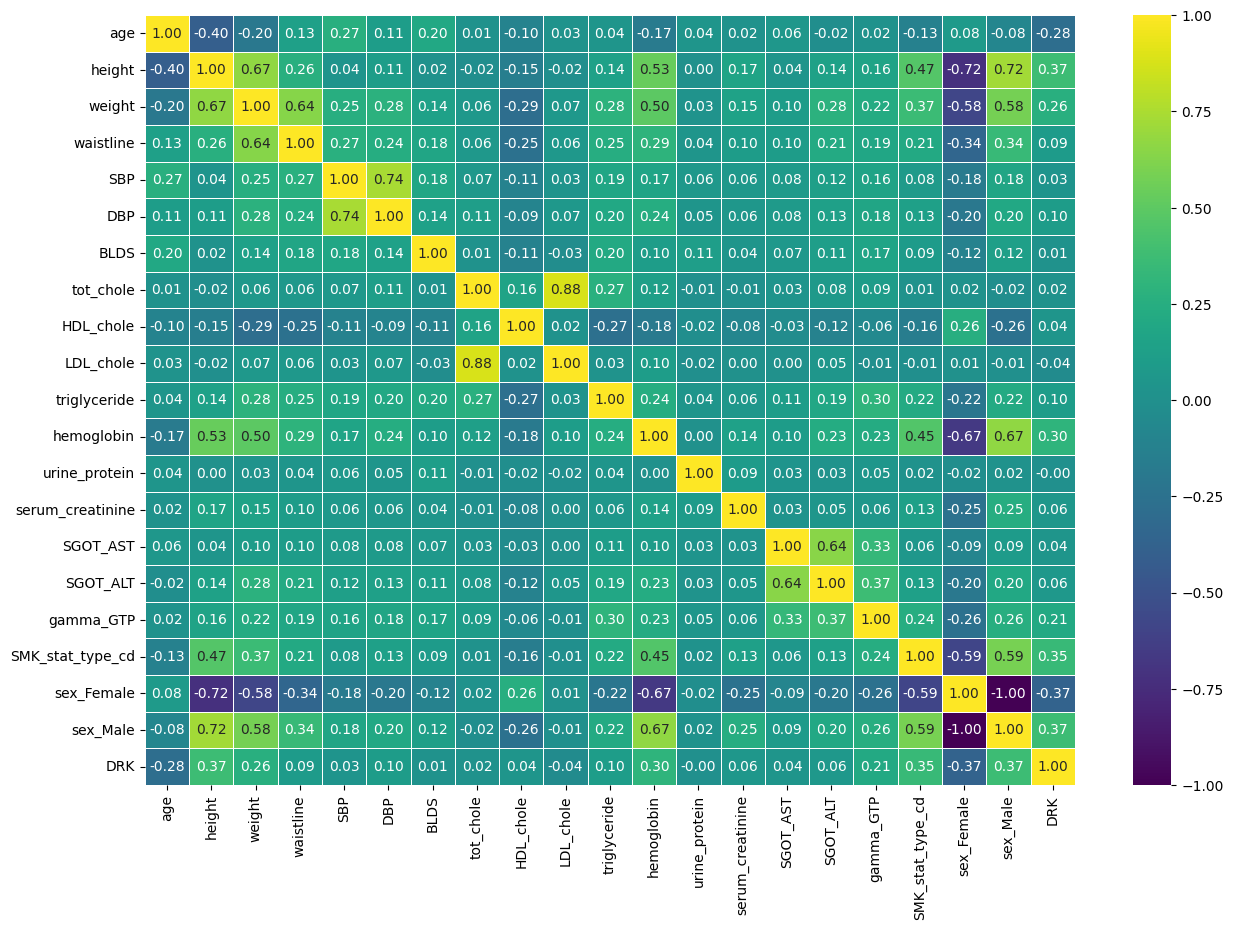

In [ ]:
corr_matrix=new_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="viridis")

In [ ]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'sex_Female', 'sex_Male', 'DRK']


In [ ]:
x=new_df[SMK_features]
y=new_df["SMK_stat_type_cd"]




*  Standardization ensures that features have zero mean and unit variance, which is useful for many machine learning algorithms.



In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x)



*    **spliting the data into the train and test set**



In [ ]:
#split into test and train
x_train,x_test,y_train,y_test= train_test_split(X_standardized,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((793076, 14), (198270, 14), (198270,), (793076,))



---



---



# **MODEL BUILDING**

## 1. **Logistic Regression Model:**



In [ ]:
# Initialize and train a logistic regression model and SVC
logistic_model = LogisticRegression(max_iter=100, fit_intercept=False)  # Set fit_intercept=False
logistic_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=100)
svc_model.fit(x_train, y_train)

# Predict the target variable on the test set
y_pred_log = logistic_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)

# Calculate the accuracy of the models
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_log)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.6740505371463156
SVM Accuracy: 0.6898673525999899


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 2. **Random Forest Model**

In [ ]:
ran_frst=RandomForestClassifier()
ran_frst.fit(x_train,y_train)
y_pred=ran_frst.predict(x_test)
accuracy_ran=accuracy_score(y_test,y_pred)
accuracy_ran

0.6966712059313058

* **Grid Search CV on RandomForest**

we use grid search with cross-validation to find the best combination of hyperparameters for a RandomForestClassifier. We define a range of hyperparameter values, including the number of trees (n_estimators), the maximum tree depth (max_depth), and the minimum samples required to split an internal node (min_samples_split).

We perform grid search using GridSearchCV from scikit-learn, which evaluates different hyperparameter combinations while ensuring model robustness through cross-validation. After fitting the grid search, we can identify the best hyperparameters to enhance the RandomForestClassifier's performance. This process aims to optimize accuracy and model generalization

In [ ]:
# Grid Search CV on RandomForest
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [None, 10],                   # Maximum depth of the tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split an internal node
}


#Logictic Regression
grid_sear=GridSearchCV(RandomForestClassifier(),
                     param_grid,
                     n_jobs=-1,
                      cv=2,
                    verbose=True)
grid_sear.fit(x_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=True)

In [ ]:
best_params = grid_sear.best_params_
best_score = grid_sear.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7011055686970731


In [ ]:
y_pred = grid_sear.predict(x_test)

# Calculate the precision score
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print("Precision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)

Precision (Micro): 0.7005901044030867
Precision (Macro): 0.597848465631571
Precision (Weighted): 0.690111855687004


In [ ]:
y_pred=grid_sear.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision (Macro):", precision_macro)
print("Recall (Macro):", recall_macro)
print("F1-score (Macro):", f1_macro)

Accuracy: 0.7005901044030867
Precision (Macro): 0.7005901044030867
Recall (Macro): 0.7005901044030867
F1-score (Macro): 0.7005901044030867


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           1       0.82      0.85      0.84    120522
           2       0.47      0.30      0.37     34965
           3       0.51      0.60      0.55     42783

    accuracy                           0.70    198270
   macro avg       0.60      0.58      0.58    198270
weighted avg       0.69      0.70      0.69    198270




* **A classification report is a summary of a classification model's performance. It includes metrics like precision (accuracy of positive predictions), recall (ability to find all relevant instances), and F1-score (a balance between precision and recall) for each class. The report provides insights into how well the model performs for individual classes, overall accuracy, and averages across classes**





# **CONFUSION MATRIX**

A confusion matrix is a common tool used to evaluate the performance of a classification model. It provides a way to summarize the results of predictions made by the model and compare them to the actual, ground truth values. A confusion matrix is especially useful for understanding the model's performance in terms of true positives, true negatives, false positives, and false negatives. These components are essential for calculating various performance metrics like accuracy, precision, recall, and F1-score.

The confusion matrix is typically presented in a tabular format with four main components:

1. True Positives (TP): These are cases where the model correctly predicted the positive class.

2. True Negatives (TN): These are cases where the model correctly predicted the negative class.

3. False Positives (FP): These are cases where the model incorrectly predicted the positive class when the actual class was negative (Type I error).

4. False Negatives (FN): These are cases where the model incorrectly predicted the negative class when the actual class was positive (Type II error).

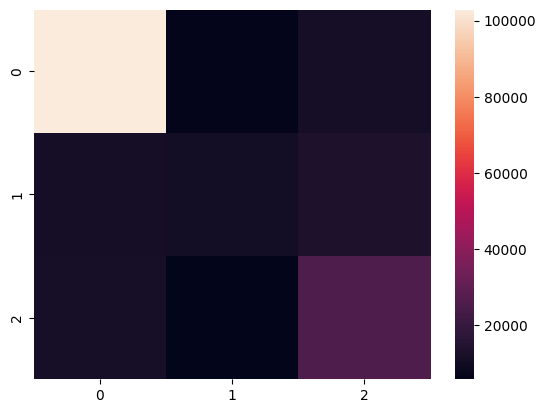

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
def plot_conf_mat(y_test,y_preds):
    fig, ax =plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                  annot=False,
                  cbar=True)

plot_conf_mat(y_test,y_pred)

In [ ]:
classes = np.unique(y_test)
classes

array([1, 2, 3])



---



# 3. AdaBoost Classifier

In [ ]:
}from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a base classifier (usually a decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
y_pred = adaboost_classifier.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')


Accuracy: 0.6988550965854643




---



---



---



# Drinking starts here

In [ ]:
df = pd.read_csv('/content/smoking_and_drinking_dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
df.shape

(991346, 24)

<Axes: xlabel='sex', ylabel='age'>

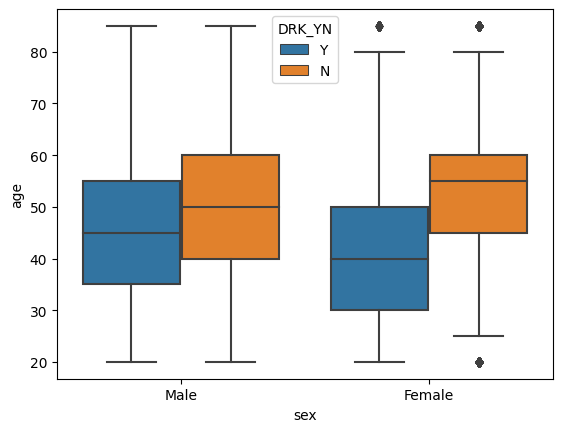

In [ ]:
sns.boxplot(x=df['sex'],y=df['age'],hue=df['DRK_YN'])

In [ ]:
pd.crosstab(df['sex'],df['DRK_YN'])
# sns.heatmap(pd.crosstab(df['sex'],df['DRK_YN']))

DRK_YN,N,Y
sex,,
Female,323760,141171
Male,172098,354317


<Axes: xlabel='DRK_YN', ylabel='SMK_stat_type_cd'>

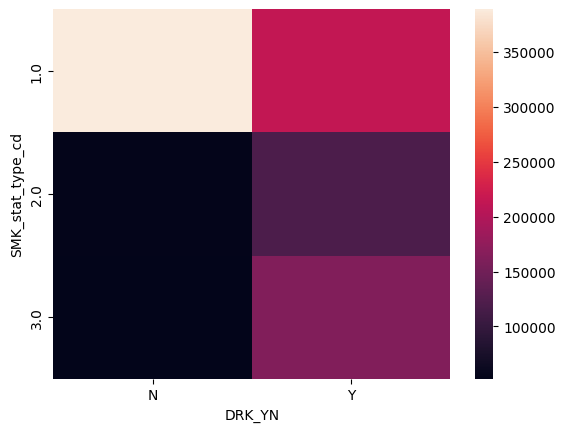

In [ ]:
sns.heatmap(pd.crosstab(df['SMK_stat_type_cd'],df['DRK_YN']))

In [ ]:
processed_df = df

In [ ]:
processed_df.shape

(991346, 24)

In [ ]:
# adding column bmi to eliminate height and weight column
processed_df['bmi'] = processed_df['weight'] / (processed_df['height']/100)**2

# taking average of sights and hearing ability of both sides
processed_df['sight'] = (processed_df['sight_left']+processed_df['sight_right'])/2
processed_df['hear'] = (processed_df['hear_left']+processed_df['hear_right'])/2

# systolic and diastolic blood pressure are related physiological measures, and there is a mathematical relationship between them.
# Blood pressure is typically expressed as a ratio of systolic pressure to diastolic pressure, and this is often written as systolic/diastolic.
# If you want to create a single feature from systolic and diastolic blood pressure, one common approach is to calculate the mean arterial pressure (MAP).
# MAP is often used in medical contexts because it provides a more representative value of the overall blood pressure.
processed_df['map'] = round((1/3)*processed_df['SBP'] + (2/3)*processed_df['DBP'],2)

processed_df.drop(columns=['height','weight','sight_left','sight_right','hear_left','hear_right','SBP','DBP'], inplace=True)


In [ ]:
# categorizing sex variable with one - hot encoding
processed_df = pd.get_dummies(processed_df, columns=['sex'], prefix=['sex'])

# categorizing Drinking variable with label encoding
label_encoder = LabelEncoder()
processed_df['DRK_YN'] = label_encoder.fit_transform(processed_df['DRK_YN'])

# converting Smoking column to type int
processed_df['SMK_stat_type_cd'] = processed_df['SMK_stat_type_cd'].astype(int)

# drop column
processed_df.drop('SMK_stat_type_cd', axis=1, inplace=True)

In [ ]:
processed_df

,age,waistline,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN,bmi,sight,hear,map,sex_Female,sex_Male
0,35,90.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,25.951557,1.00,1.0,93.33,0,1
1,30,89.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0,24.691358,1.05,1.0,98.00,0,1
2,40,91.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,27.548209,1.35,1.0,86.67,0,1
3,50,91.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,26.122449,1.35,1.0,106.33,0,1
4,50,80.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,22.038567,1.10,1.0,100.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,92.1,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,0,26.122449,1.50,1.0,91.33,0,1
991342,35,86.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,0,25.951557,1.25,1.0,95.00,0,1
991343,40,68.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,1,20.811655,0.85,1.0,83.33,1,0
991344,25,72.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,0,19.591837,1.25,1.0,89.00,0,1


In [ ]:
cor = processed_df.corr()

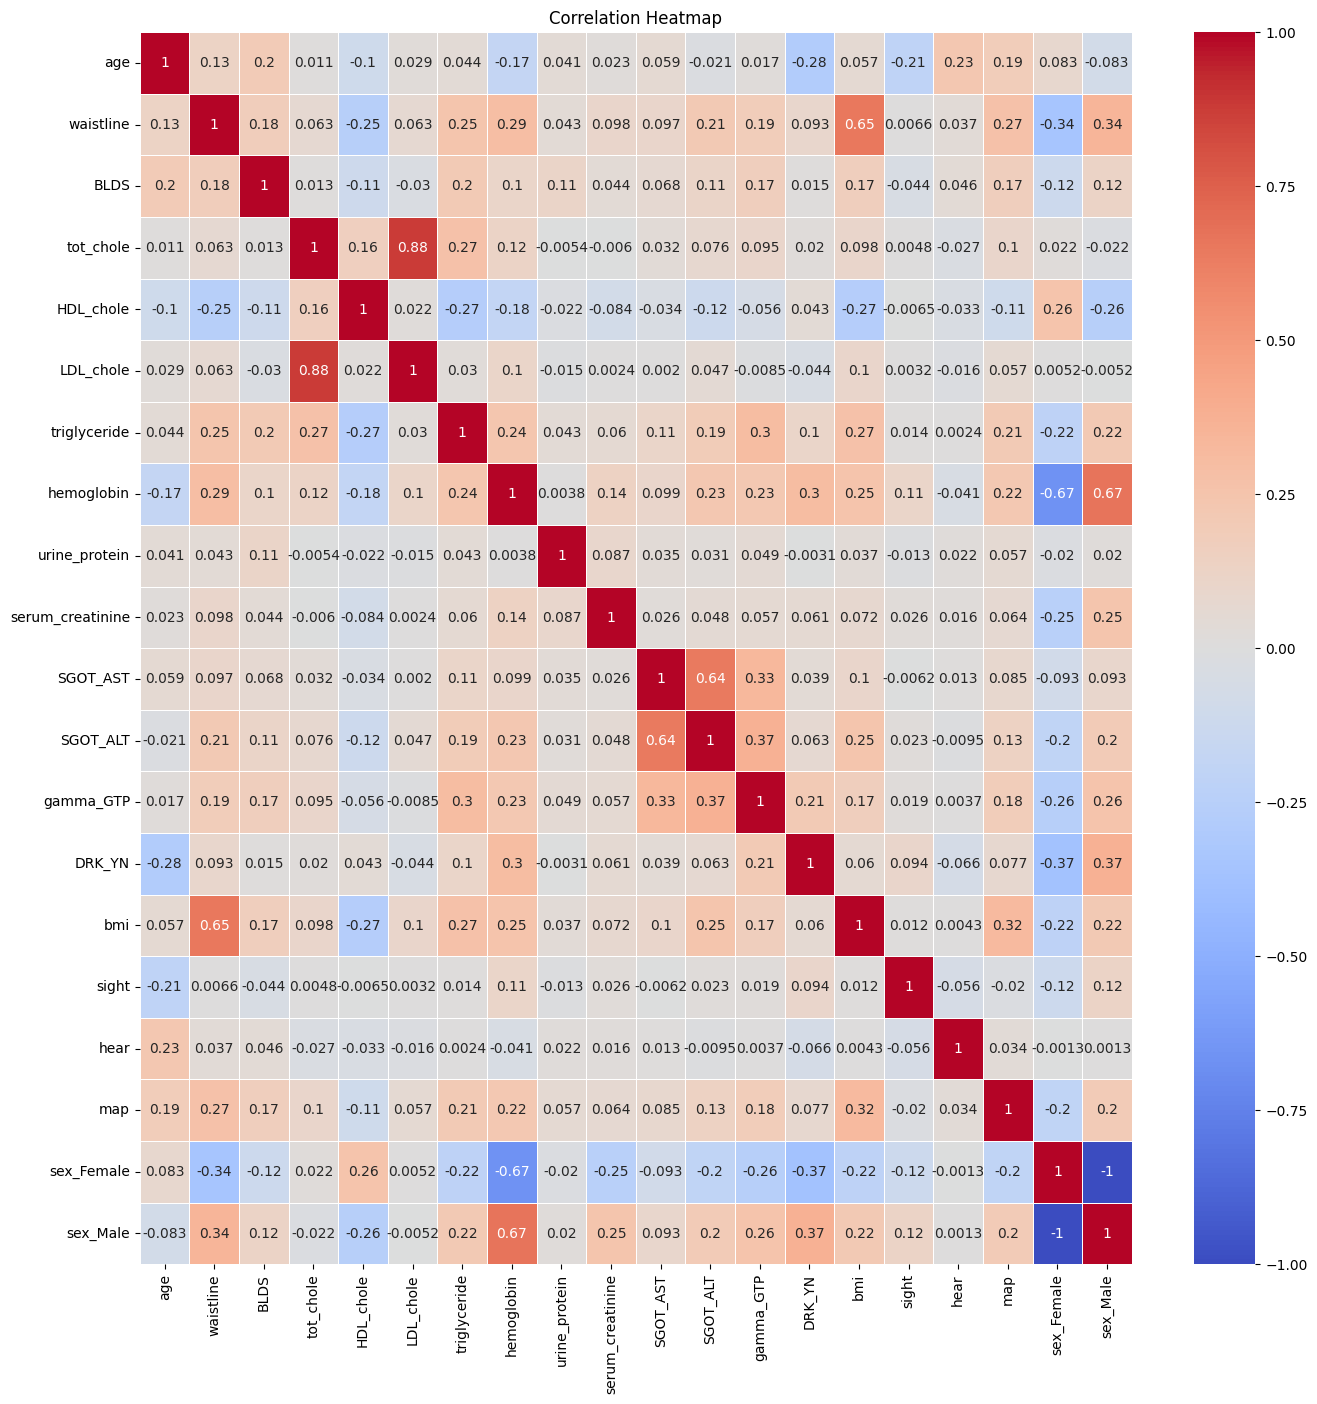

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filtered_df is your DataFrame with relevant columns
# Calculate the correlation matrix

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap
sns.heatmap(data=cor, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()




*  **we perform feature selection by analyzing the correlation between features and the target variable 'DRK_YN' in our dataset. The goal is to identify and retain features that exhibit a strong correlation, whether positive or negative, with the target variable. This process can help us focus on the most relevant features for our predictive model.**



In [ ]:
correlations = processed_df.corr()['DRK_YN']
relevant_features = correlations[(correlations > 0.075) | (correlations < -0.075)]
relevant_features = relevant_features.index.tolist()
print(relevant_features)
processed_df = processed_df[relevant_features].copy()

['age', 'waistline', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'DRK_YN', 'sight', 'map', 'sex_Female', 'sex_Male']


In [ ]:
print('processed_df.shape')
processed_df.shape

processed_df.shape


(991346, 10)

In [ ]:
print('processed_df.columns')
processed_df

processed_df.columns


,age,waistline,triglyceride,hemoglobin,gamma_GTP,DRK_YN,sight,map,sex_Female,sex_Male
0,35,90.0,92.0,17.1,40.0,1,1.00,93.33,0,1
1,30,89.0,121.0,15.8,27.0,0,1.05,98.00,0,1
2,40,91.0,104.0,15.8,68.0,0,1.35,86.67,0,1
3,50,91.0,106.0,17.6,18.0,0,1.35,106.33,0,1
4,50,80.0,104.0,13.8,25.0,0,1.10,100.67,0,1
...,...,...,...,...,...,...,...,...,...,...
991341,45,92.1,132.0,15.0,27.0,0,1.50,91.33,0,1
991342,35,86.0,45.0,15.8,15.0,0,1.25,95.00,0,1
991343,40,68.0,157.0,14.3,17.0,1,0.85,83.33,1,0
991344,25,72.0,53.0,14.5,17.0,0,1.25,89.00,0,1


# Removing Outliers



*  **Outliers are data points that significantly deviate from the majority of the data, and they can affect the accuracy and robustness of statistical analysis and machine learning models. To remove outliers using percentiles:**



1. **Calculate Percentiles**: Begin by calculating the desired percentiles, typically the 25th (Q1) and 75th (Q3) percentiles. These values help define the interquartile range (IQR), which is the range within which most of the data lies.

## Trick used - percentiles

In [ ]:
# Calculate 25th and 75th percentiles for each column
percentile_25 = processed_df.quantile(0)
percentile_75 = processed_df.quantile(1)

# Filter instances based on percentiles for each column
processed_df = processed_df[(processed_df >= percentile_25) & (processed_df <= percentile_75)].dropna()


In [ ]:
print('processed_df.shape')
processed_df.shape

processed_df.shape


(991346, 10)

In [ ]:
# Separate features (X) and target variable (y)
X = processed_df.drop(columns=['DRK_YN'])
y = processed_df['DRK_YN']

In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

In [ ]:
# Fit and transform the scaler on the training data
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building for Drinker Classifier

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the standardized training data
logreg.fit(X_train, y_train)

# Make predictions on the standardized test data
predictions = logreg.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.71


# Hyperparameter Tuning - Logistic Regression

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'C': 1}
Best Cross-Validated Accuracy: 0.71


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.72      0.69      0.70     99595
           1       0.70      0.72      0.71     98675

    accuracy                           0.71    198270
   macro avg       0.71      0.71      0.71    198270
weighted avg       0.71      0.71      0.71    198270



# K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=20)  # You can adjust the number of neighbors (k) as needed

# Train the model on the scaled training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the scaled test data
predictions = knn_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     99595
           1       0.70      0.70      0.70     98675

    accuracy                           0.70    198270
   macro avg       0.70      0.70      0.70    198270
weighted avg       0.70      0.70      0.70    198270

